Number of images= 1440
Number of features= 12




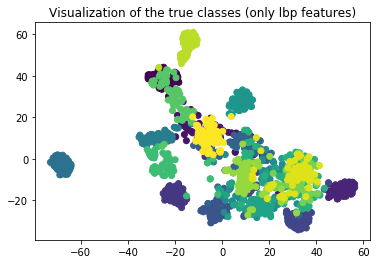

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from Image_reading import *
from Texture_descriptors import lbp 


if __name__ == '__main__':
#   Parameters defintion:
    n1=1 # First image (included)
    n2=21 # Last image (excluded)
    n_img=72 # number of images per object
    n_clusters_=n2-n1 # number of objects
    hist_size = 12 # size of the histogram for the lbp descriptor
    
#     Classes_true is a vector containing the true classes
    classes_true=[]
    for i in range(0,n2-n1):
        classes_true=classes_true+[i]*n_img
    classes_true=np.array(classes_true)

#    We regroup the images features in a single 2D-Array where each line is the feature vector of the image
    X_all=[]
    for i in range(n_img*(n2-n1)):
        X_all.append([])
    for i in range(n2-n1):
        for j in range(n_img):
            X=read_image_2(i+n1,j)
            # ********************Texture_features***********************
            lbp_ftr = lbp(X,hist_size)
            X_all[n_img*i+j]=X_all[n_img*i+j]+[lbp_ftr]
            X_all[n_img*i+j]=np.concatenate(X_all[n_img*i+j])
    
    X_all=np.array(X_all).astype(float)
    print("Number of images= "+ str(X_all.shape[0]))
    print("Number of features= "+ str(X_all.shape[1]))
    print("\n")
    
    
    # *********************Visualisation**********************
    X_norm = StandardScaler().fit_transform(X_all)
    X_embedded = TSNE(n_components=2).fit_transform(X_norm)
    
    plt.figure()
    plt.scatter(X_embedded[:,0],X_embedded[:,1],c=classes_true)
    plt.title("Visualization of the true classes (only lbp features)")
    plt.show()